# AULA 4 - Prática 1: Redes Convolucionais


Aula 4- Aula Assíncrona
https://www.youtube.com/watch?v=sbSUzcoPmEg&ab_channel=MoacirAntonelliPonti

---

## PyTorch introdução à Dataset e DataLoader

- Utilizar o miniset como exemplo de dataset

---

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader

In [3]:
FashionMNIST

torchvision.datasets.mnist.FashionMNIST

Podemos carregar um dataset já existente, utilizando os seguintes parâmetros:
- `root`: caminho onde os dados serão armazenados localmente
- `train`: variável binária que define se carregar os dados de treinamento (`True`) o teste (`False`)
- `download`: se `True` faz download da Internet caso os dados não estejam disponíveis localmente
- `transform` e `target_transform` especifica transformações para as features e labels.

In [5]:
training_data = FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

* Cada posição é uma tupla com 2 elementos: **features (imagens nesse caso) e o rótulo da classe**
    * Abaixo: vemos que a posição 0 é uma tupla, com uma imagem 28x28 e 1 canal de cor na primeira posição e a classe 9 dela

In [6]:
type(training_data[0]), training_data[0][0].shape, training_data[0][1]

(tuple, torch.Size([1, 28, 28]), 9)

- Ver alguns itens aleatórios de algumas posições aleatórios (escala grey)
    * Classificação dos números em palavras

In [7]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

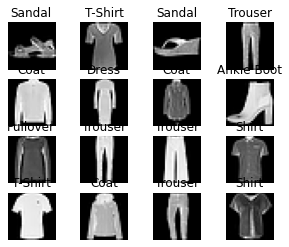

In [8]:
figure = plt.figure(figsize=(5, 4))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

---

### Dataloader

- É uma classe que combina um dataset com um amostrador, provendo uma forma de iterar sobre o dataset:
    - Por mini-batches
    - Com opção de aleatorizar


In [9]:
train_dataloader = DataLoader(training_data, batch_size=2, shuffle=True)

# iter itera sobre o dataloader
train_dataloader, iter(train_dataloader) 

(<torch.utils.data.dataloader.DataLoader at 0x7f743a2fc400>,
 <torch.utils.data.dataloader._SingleProcessDataLoaderIter at 0x7f74386a70a0>)

In [10]:
# com next podemos pegar o proximo batch via iterador
next(iter(train_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]]),
 tensor([0, 1])]

In [11]:
next(iter(train_dataloader))[0][0].shape, next(iter(train_dataloader))[1][0] # imagem e rótulo

(torch.Size([1, 28, 28]), tensor(6))

Feature batch shape: torch.Size([2, 1, 28, 28])
Labels batch shape: torch.Size([2])



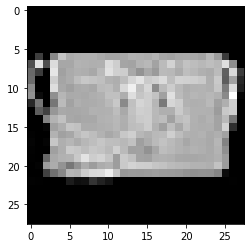

Label: Bag


In [12]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}\n')
img = train_features[0].squeeze()
label = train_labels[0].item()
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {labels_map[label]}')